In [91]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import pandas as pd
from scipy.optimize import curve_fit
rg = Generator(PCG64(12345))

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import cm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set()

In [92]:
from numpy import *
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from importlib import reload
import seaborn as sns
from sklearn import linear_model
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [93]:
from scipy.stats import multivariate_normal

In [94]:
rv_mean = [0, 0]  # mean of x and y  
rv_cov = [[1,0.5], [0.5,1]]  # covariance matrix of x and y
rv = multivariate_normal.rvs(rv_mean, rv_cov, size=252)
rv1 = rv[:,1]
rv2 = rv[:,0]
def CIR_SimulateM(r0,A,B,sigma,Deltat,N,rv):
    rt = np.empty_like(rv1)
    rt[0] = r0
    for i in range(1,N):
     rt[i] = rt[i-1]+A*(B-rt[i-1])*Deltat+sigma*(rt[i-1]*Deltat)**0.5*rv[i]+0.5*sigma**2*(rv[i]**2-1)*Deltat
    return rt

In [95]:
def simulate():
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for i in range (1,1001):
        rv_mean = [0, 0]  # mean of x and y  
        rv_cov = [[1,0.5], [0.5,1]]  # covariance matrix of x and y
        rv = multivariate_normal.rvs(rv_mean, rv_cov, size=252)
        rv1 = rv[:,1]
        rv2 = rv[:,0]
        cir_simulation = CIR_SimulateM(0.5, 2, 0.1,0.04, 1/252,250,rv1)
        cir_simulation1 = CIR_SimulateM(0.7, 3, 0.03,0.05, 1/252,250,rv2)
        df1[i] =  cir_simulation
        df2[i] = cir_simulation1
    return df1, df2

In [96]:
a, b = simulate()

In [97]:
cir_simulation= a.dropna()

In [98]:
cir_simulation

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.500554,0.496330,0.497984,0.496903,0.498375,0.496580,0.498213,0.495027,0.493772,0.497385,...,0.494458,0.498338,0.498241,0.495521,0.498068,0.496858,0.496032,0.497890,0.499143,0.495540
2,0.494503,0.494460,0.497619,0.493766,0.496013,0.494117,0.498039,0.494138,0.491672,0.496798,...,0.492604,0.492701,0.494350,0.495417,0.491593,0.499914,0.494196,0.495833,0.494118,0.489201
3,0.491454,0.488805,0.497566,0.492357,0.494091,0.490878,0.497183,0.490264,0.488317,0.495347,...,0.491644,0.491521,0.493160,0.493216,0.486802,0.495431,0.490292,0.494362,0.494193,0.486538
4,0.492268,0.487579,0.494818,0.486728,0.489349,0.487448,0.494533,0.485176,0.486282,0.493035,...,0.489827,0.489323,0.489374,0.491642,0.486882,0.492487,0.485248,0.492573,0.488626,0.481525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.145426,0.154602,0.158011,0.165150,0.153237,0.152199,0.162971,0.156103,0.163262,0.156904,...,0.164104,0.156625,0.143298,0.149479,0.151399,0.149081,0.158279,0.160737,0.156134,0.160074
246,0.144245,0.153861,0.157849,0.165056,0.151038,0.150626,0.162723,0.156371,0.164196,0.156774,...,0.162993,0.156542,0.142768,0.148932,0.151417,0.149789,0.156131,0.158850,0.156686,0.158895
247,0.144826,0.154005,0.158512,0.164908,0.152139,0.149130,0.161537,0.156026,0.163165,0.156657,...,0.162027,0.154841,0.141317,0.149855,0.151328,0.149563,0.156535,0.156745,0.154946,0.159262
248,0.144794,0.153842,0.156990,0.163762,0.151176,0.147840,0.161536,0.154468,0.162345,0.156730,...,0.160660,0.156212,0.140638,0.147716,0.151117,0.149174,0.156309,0.154001,0.154649,0.161000


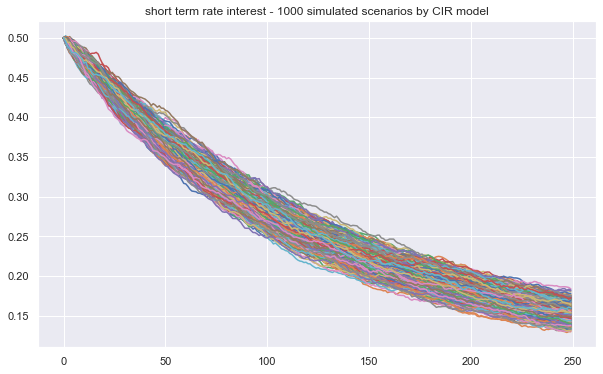

In [99]:
cir_simulation.plot(figsize=(10,6), legend=False, title='short term rate interest - 1000 simulated scenarios by CIR model')

In [100]:
def data(cir_simulation):
    N=250
    df = pd.DataFrame()
    y = np.zeros(N)
    x = np.zeros(N)
    for i in range(1,N):
        y[i] = cir_simulation[i]- cir_simulation[i-1]
        df['y'] = y
        x[i] =cir_simulation[i-1]
        df['x'] = x
    
    return df

In [101]:
cd = np.array(new['x'])
dcd = np.array(new['y'])
inst = np.column_stack((np.ones(len(cd)), cd))

In [102]:
from __future__ import division
import numpy as np
from scipy.special import psi
from statsmodels.sandbox.regression.gmm import GMM

In [103]:
class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2 = params
        endog = self.endog
        exog = self.exog.squeeze()
        inst = self.instrument   
        dt = 1/252
        error1 = endog - p0 - p1 * exog *dt
        error2 = error1 * exog
        error3 = error1**2 - dt*p2*p2*exog
        #error4 = error3* exog
        g = np.column_stack((error1, error2, error3))
        return g


In [104]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation.columns),3))
param_names = ['a\N{SUBSCRIPT ONE}','b\N{SUBSCRIPT ONE}','\u03C3\N{SUBSCRIPT ONE}']
for i in range(1,len(cir_simulation.columns)):
    dt= 1/252
    new = data(cir_simulation[i])
    cd = np.array(new['x'])
    dcd = np.array(new['y'])
    beta0 = np.array([0.1, 0.1, 0.01])
    res = gmm(endog = dcd, exog = cd, instrument = inst, k_moms=3, k_params=3).fit(beta0)
    res.model.exog_names[:] = 'p0 p1 p2'.split()
    param_fits[i,0] = -res.params[1]
    param_fits[i,1] = res.params[0]/param_fits[i,0]/dt
    param_fits[i,2] = -res.params[2]
        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 24
         Gradi

In [105]:
param_fits

,a₁,b₁,σ₁
0,0.000000,0.000000,0.000000
1,1.619000,0.055525,0.038817
2,2.217100,0.113128,0.042878
3,1.843903,0.090059,0.039714
4,2.271227,0.128006,0.042900
...,...,...,...
995,2.204514,0.106448,0.038581
996,2.112549,0.096856,0.041692
997,2.618824,0.131968,0.037983
998,1.663080,0.072753,0.041307


In [106]:
param_fits.describe()

,a₁,b₁,σ₁
count,1000.000000,1000.000000,1000.000000
mean,1.995258,0.096753,0.032391
std,0.242264,0.020592,0.023148
min,0.000000,0.000000,-0.045046
25%,1.840502,0.084331,0.038028
50%,2.002537,0.098876,0.039538
75%,2.149942,0.111861,0.040913
max,2.893753,0.150961,0.046165


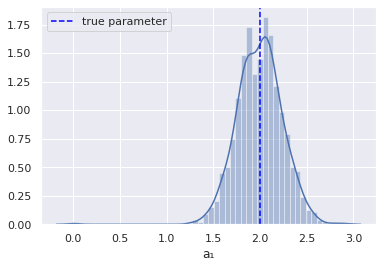

In [107]:
d1 = sns.distplot(param_fits.loc[:,'a\N{SUBSCRIPT ONE}'], bins=50)
plt.rcParams['font.sans-serif']=['SimHei']
plt.axvline(2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

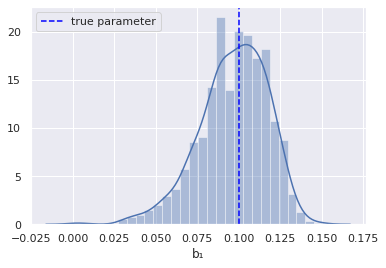

In [108]:
d2 = sns.distplot(param_fits.loc[:,'b\N{SUBSCRIPT ONE}'])
plt.axvline(0.1, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


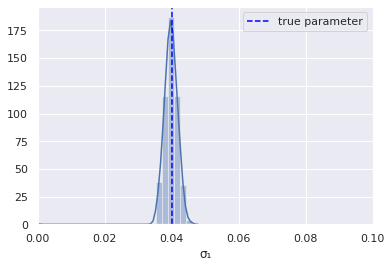

In [109]:
d3 = sns.distplot(param_fits.loc[:,'\u03C3\N{SUBSCRIPT ONE}'])
plt.axvline(0.04, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.xlim([0, 0.1])
plt.legend()
d3

###############################################################################################


In [110]:
cir_simulation1 = b.dropna()

In [111]:
cir_simulation1

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,...,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
1,0.693954,0.696190,0.692368,0.693813,0.696719,0.691367,0.695134,0.691155,0.690154,0.690881,...,0.690173,0.690875,0.691041,0.692559,0.691208,0.689769,0.691589,0.690903,0.692941,0.690776
2,0.683227,0.692701,0.685277,0.685556,0.688351,0.680622,0.690936,0.687510,0.682833,0.685001,...,0.686456,0.676145,0.683861,0.685993,0.682837,0.687194,0.681585,0.681415,0.682695,0.679855
3,0.676407,0.682587,0.681342,0.678041,0.682560,0.670698,0.683385,0.677298,0.677726,0.677247,...,0.679858,0.669119,0.679078,0.676461,0.672132,0.679001,0.672672,0.678537,0.678970,0.676655
4,0.670813,0.674398,0.676487,0.665446,0.676313,0.662334,0.676550,0.666578,0.669503,0.673374,...,0.671770,0.660235,0.671097,0.672369,0.666084,0.669968,0.662588,0.673156,0.671627,0.668839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.057456,0.064370,0.072380,0.064398,0.074137,0.062688,0.067929,0.070249,0.068477,0.072716,...,0.066099,0.066179,0.055938,0.059082,0.060943,0.062602,0.057177,0.073233,0.065246,0.071081
246,0.056838,0.063949,0.072715,0.063995,0.073985,0.061381,0.067922,0.069556,0.068350,0.072519,...,0.065473,0.064691,0.055242,0.058916,0.061361,0.062765,0.055937,0.073518,0.065271,0.071041
247,0.057645,0.063028,0.072736,0.064110,0.073309,0.059428,0.068161,0.068227,0.067794,0.072583,...,0.064874,0.063152,0.053825,0.059047,0.061473,0.063136,0.057013,0.071783,0.063589,0.071055
248,0.057015,0.062709,0.071209,0.063993,0.072315,0.059297,0.069284,0.067943,0.067433,0.071394,...,0.065581,0.063482,0.054333,0.058259,0.060827,0.061560,0.057426,0.070072,0.062532,0.072218


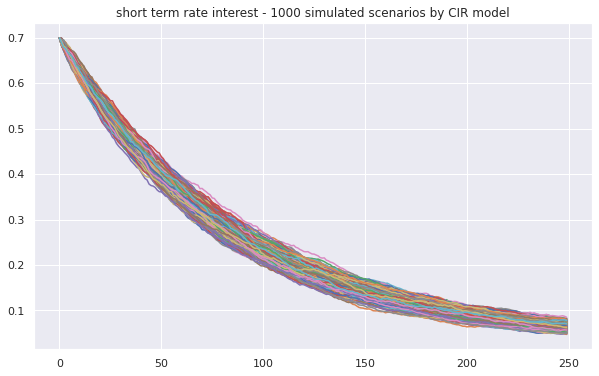

In [112]:
cir_simulation1.plot(figsize=(10,6), legend=False, title='short term rate interest - 1000 simulated scenarios by CIR model')

In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation.columns),3))
param_names = ['a\N{SUBSCRIPT TWO}','b\N{SUBSCRIPT TWO}','\u03C3\N{SUBSCRIPT TWO}']
for i in range(1,len(cir_simulation1.columns)):
    dt= 1/252
    new = data(cir_simulation1[i])
    cd = np.array(new['x'])
    dcd = np.array(new['y'])
    beta0 = np.array([0.1, 0.1, 0.01])
    res = gmm(endog = dcd, exog = cd, instrument = inst, k_moms=3, k_params=3).fit(beta0)
    res.model.exog_names[:] = 'p0 p1 p2'.split()
    param_fits[i,0] = -res.params[1]
    param_fits[i,1] = res.params[0]/param_fits[i,0]/dt
    param_fits[i,2] = -res.params[2]
        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 23
         Gradi

In [115]:
param_fits

,a₂,b₂,σ₂
0,0.000000,0.000000,0.000000
1,3.086704,0.027121,0.047081
2,2.885869,0.024138,0.050281
3,2.942901,0.031680,0.050685
4,3.178143,0.041801,0.051637
...,...,...,...
995,3.221109,0.030603,0.046499
996,3.266263,0.037663,0.048323
997,3.220147,0.033092,0.046169
998,2.790759,0.026312,0.052445


In [116]:
param_fits.describe()

,a₂,b₂,σ₂
count,1000.000000,1000.000000,1000.000000
mean,3.007126,0.029824,0.049271
std,0.214452,0.011438,0.006403
min,0.000000,-0.004635,-0.055979
25%,2.876567,0.022288,0.047770
50%,3.002276,0.030602,0.049569
75%,3.138194,0.037869,0.051337
max,3.754073,0.065542,0.059852


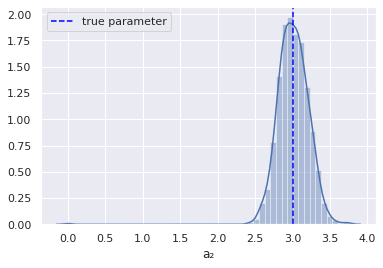

In [118]:
d1 = sns.distplot(param_fits.loc[:,'a\N{SUBSCRIPT TWO}'], bins=50)
plt.axvline(3, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

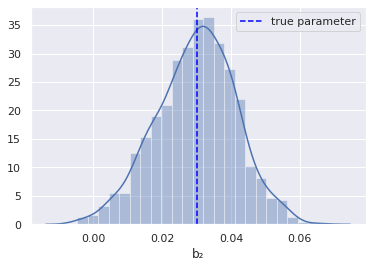

In [120]:
d2 = sns.distplot(param_fits.loc[:,'b\N{SUBSCRIPT TWO}'])
plt.axvline(0.03, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


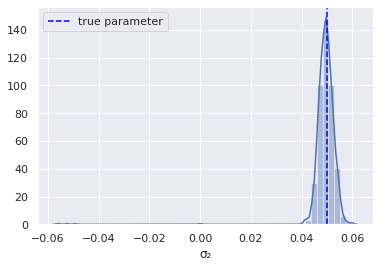

In [122]:
d3 = sns.distplot(param_fits.loc[:,'\u03C3\N{SUBSCRIPT TWO}'])
plt.axvline(0.05, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()
d3